In [1]:
from sklearn.model_selection import cross_val_score
>>> from sklearn.ensemble import RandomForestClassifier
>>> from sklearn.ensemble import ExtraTreesClassifier
>>> from sklearn.tree import DecisionTreeClassifier
from sklearn.inspection import permutation_importance
from sklearn import tree
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
nurse_df = pd.read_csv('../output_data/model_data.csv')
nurse_df.head()

,Cum GPA,TEAS Count,MaxOfTestScore,failing grade count,Time to Test (days),Completion Time (days),PrecEducDesc,Grade,GradePass,HighSchool,Assoc,Bach,Masters
0,2.84,1.0,76.0,0,209.00,591.0,High School/GED/Some College,Pass,1.0,1.0,0.0,0.0,0.0
1,3.14,1.0,74.7,0,73.00,467.0,High School/GED/Some College,Pass,1.0,1.0,0.0,0.0,0.0
2,3.22,1.0,75.3,0,84.51,578.0,High School/GED/Some College,Pass,1.0,1.0,0.0,0.0,0.0
3,3.29,2.0,77.3,0,60.00,591.0,High School/GED/Some College,Fail,0.0,1.0,0.0,0.0,0.0
4,3.38,2.0,72.7,0,80.33,600.0,Associates,Pass,1.0,0.0,1.0,0.0,0.0


In [3]:
nurses_df = nurse_df.drop(['PrecEducDesc', 'Grade'], axis=1)
nurses_df.head()

,Cum GPA,TEAS Count,MaxOfTestScore,failing grade count,Time to Test (days),Completion Time (days),GradePass,HighSchool,Assoc,Bach,Masters
0,2.84,1.0,76.0,0,209.00,591.0,1.0,1.0,0.0,0.0,0.0
1,3.14,1.0,74.7,0,73.00,467.0,1.0,1.0,0.0,0.0,0.0
2,3.22,1.0,75.3,0,84.51,578.0,1.0,1.0,0.0,0.0,0.0
3,3.29,2.0,77.3,0,60.00,591.0,0.0,1.0,0.0,0.0,0.0
4,3.38,2.0,72.7,0,80.33,600.0,1.0,0.0,1.0,0.0,0.0


In [4]:
nurses_df_pass = nurses_df[nurses_df["GradePass"]== 1]
len(nurses_df_pass)

898

In [5]:
nurses_df_fail = nurses_df[nurses_df["GradePass"] != 1]
len(nurses_df_fail)

327

In [6]:
new_data = pd.concat([nurses_df_fail ,nurses_df_pass.sample(n=len(nurses_df_fail)) ],copy=True,ignore_index=True)
len(new_data)

654

In [7]:
target = new_data["GradePass"]
target_names = ["negative", "positive"]
target

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
649    1.0
650    1.0
651    1.0
652    1.0
653    1.0
Name: GradePass, Length: 654, dtype: float64

In [8]:
data = new_data.drop("GradePass", axis=1)
feature_names = data.columns
data.head()

,Cum GPA,TEAS Count,MaxOfTestScore,failing grade count,Time to Test (days),Completion Time (days),HighSchool,Assoc,Bach,Masters
0,3.29,2.0,77.3,0,60.00,591.0,1.0,0.0,0.0,0.0
1,2.78,2.0,74.0,0,369.00,465.0,1.0,0.0,0.0,0.0
2,2.79,3.0,74.0,0,116.00,591.0,1.0,0.0,0.0,0.0
3,3.27,2.0,68.7,1,124.58,578.0,0.0,1.0,0.0,0.0
4,2.76,2.0,73.3,0,158.00,460.0,1.0,0.0,0.0,0.0


In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target)

In [10]:
rf = ExtraTreesClassifier(n_estimators=100, max_depth=4)
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.7621951219512195

In [11]:
sorted(zip(rf.feature_importances_, feature_names), reverse=True)

[(0.5273408916383098, 'Cum GPA'),
 (0.1287801655417259, 'MaxOfTestScore'),
 (0.10007243801123368, 'Completion Time (days)'),
 (0.0913881436860647, 'TEAS Count'),
 (0.07425018003737506, 'failing grade count'),
 (0.04798783392672404, 'Time to Test (days)'),
 (0.011080075236218082, 'Bach'),
 (0.007581632900940993, 'HighSchool'),
 (0.006813728268757735, 'Assoc'),
 (0.00470491075264997, 'Masters')]

In [12]:
result = new_data.values
pd.DataFrame(result)

,0,1,2,3,4,5,6,7,8,9,10
0,3.29,2.0,77.3,0.0,60.00,591.0,0.0,1.0,0.0,0.0,0.0
1,2.78,2.0,74.0,0.0,369.00,465.0,0.0,1.0,0.0,0.0,0.0
2,2.79,3.0,74.0,0.0,116.00,591.0,0.0,1.0,0.0,0.0,0.0
3,3.27,2.0,68.7,1.0,124.58,578.0,0.0,0.0,1.0,0.0,0.0
4,2.76,2.0,73.3,0.0,158.00,460.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
649,3.25,2.0,74.0,0.0,202.00,586.0,1.0,1.0,0.0,0.0,0.0
650,3.83,1.0,90.0,0.0,103.00,474.0,1.0,1.0,0.0,0.0,0.0
651,2.67,1.0,78.7,1.0,146.52,712.0,1.0,1.0,0.0,0.0,0.0
652,2.84,2.0,72.7,0.0,40.52,704.0,1.0,1.0,0.0,0.0,0.0


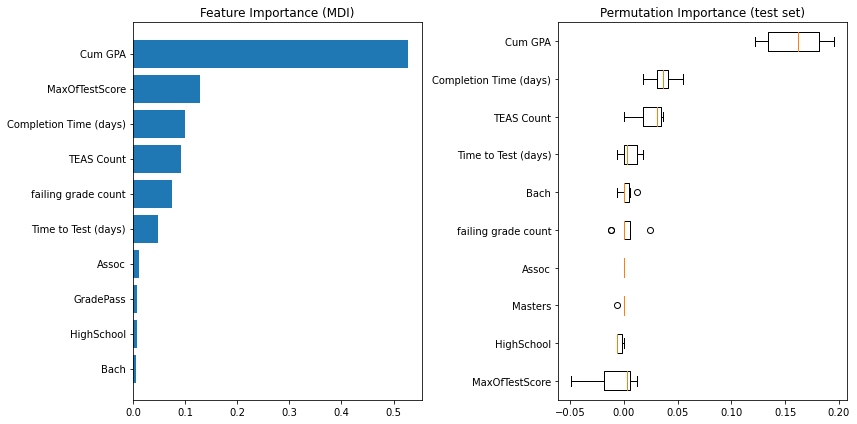

In [13]:
#plot feature importance

feature_importance = rf.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, new_data.columns[sorted_idx])
plt.title('Feature Importance (MDI)')

result = permutation_importance(rf, X_test, y_test, n_repeats=10,
                                random_state=42, n_jobs=2)
sorted_idx = result.importances_mean.argsort()
plt.subplot(1, 2, 2)
plt.boxplot(result.importances[sorted_idx].T,
            vert=False, labels= data.columns[sorted_idx])
plt.title("Permutation Importance (test set)")
fig.tight_layout()
plt.savefig('Outputs/extreme_trees1.png')
plt.show()

In [14]:
#from sklearn.tree import export_graphviz
#import graphviz

##create, display and export sample tree
#clf = tree.DecisionTreeClassifier()
#clf = clf.fit(X_train, y_train)
#clf.score(X_test, y_test)
#dot_data = tree.export_graphviz(clf, out_file=None, 
#                feature_names = feature_names,
#                class_names = target_names,
#                rounded = True, proportion = False, 
#                precision = 2, filled = True)
#import pydotplus
#graph = pydotplus.graph_from_dot_data(dot_data)
#graph.write_png('iris.png')

#graph = graphviz.Source(dot_data)  
#graph

In [15]:
#import os
#os.system('dot -Tpng tree.dot -o tree.png')


In [16]:
#from IPython.display import Image
#Image(filename = 'tree.png')

In [17]:
rf.get_params()

{'bootstrap': False,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 4,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [18]:
y_predict = rf.predict(X_test)
y_predict

array([0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0.,
       1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 0., 1., 1., 1., 0., 1., 0.,
       0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 0., 1., 0., 1., 0., 1., 1.,
       0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 1., 0., 0., 1., 1., 1., 0., 0., 1., 0., 1., 1., 0., 1., 1., 0.,
       1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1.,
       0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 0., 0., 0.,
       1., 0., 1., 0., 0., 0., 0., 1., 1., 0., 1., 1., 1., 1., 1., 0., 0.,
       1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0.,
       0., 0., 1., 0., 1., 1., 0., 0., 1., 0., 1.])

In [19]:
y_test

144    0.0
362    1.0
542    1.0
576    1.0
196    0.0
      ... 
561    1.0
578    1.0
458    1.0
64     0.0
355    1.0
Name: GradePass, Length: 164, dtype: float64

In [20]:
 # Calculate classification report
from sklearn.metrics import classification_report

print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

         0.0       0.73      0.82      0.77        80
         1.0       0.81      0.70      0.75        84

    accuracy                           0.76       164
   macro avg       0.77      0.76      0.76       164
weighted avg       0.77      0.76      0.76       164



In [21]:
class_report = classification_report(y_test, y_predict, output_dict=True)
class_report_df = pd.DataFrame(class_report).transpose()
class_report_df.to_csv('Outputs/extreme_trees_report.csv')
class_report_df

,precision,recall,f1-score,support
0.0,0.725275,0.825000,0.771930,80.000000
1.0,0.808219,0.702381,0.751592,84.000000
accuracy,0.762195,0.762195,0.762195,0.762195
macro avg,0.766747,0.763690,0.761761,164.000000
weighted avg,0.767758,0.762195,0.761513,164.000000
